## Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read .csv files into variables

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Description of datasets

In [3]:
print('Training data description----------------------------------------')
print(train_data.describe())
print('\nTesting data description----------------------------------------')
print(test_data.describe())

Training data description----------------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Testing data d

## Datasets information

In [4]:
print('Training data information----------------------------------------')
print(train_data.info())
print('\nTesting data information----------------------------------------')
print(test_data.info())

Training data information----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Testing data information----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #

## Check for Missing Data

In [5]:
print("Training Data----------------------------------")
print(train_data.isnull().sum())
print("\nTesting Data----------------------------------")
print(test_data.isnull().sum())

Training Data----------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Testing Data----------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Combine Datasets

In [6]:
titanic_all = pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [7]:
titanic_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [8]:
titanic_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
titanic_all.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

## Data Cleansing

## How many missing ages total?

In [10]:
print(f'Total ages missing for entire dataset: {titanic_all["Age"].isnull().sum()}')
#{round(titanic_all["Age"].isnull().sum()/len(titanic_all)*100,0)}
print(f'Percent of ages missing for entire dataset: {round(titanic_all["Age"].isnull().sum()/len(titanic_all)*100,0)}'+ '%')

Total ages missing for entire dataset: 263
Percent of ages missing for entire dataset: 20.0%


## Fill missing age data with median values

In [11]:
# Overall passenger age is scewed right, so will replace with median age per class
# Will do this for each dataset provided: train and test

In [12]:
print('Median age per class-------------------------------------------- ')
display(titanic_all.groupby("Pclass")["Age"].median())

Median age per class-------------------------------------------- 


Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [13]:
print('Median for Age separated by Class and Sex--------------------------------------')
display(titanic_all.groupby(["Pclass", "Sex"])["Age"].median())

Median for Age separated by Class and Sex--------------------------------------


Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

## Replace missing age values in train and test data sets with median age by class and sex

In [14]:
train_data['Age'] = titanic_all.groupby(["Pclass", "Sex"])["Age"].apply(lambda x: x.fillna(x.median()))
print(f"Null Age values in train_data: {train_data['Age'].isnull().sum()}")
#---------------------------------------------------------------------------------------------------------
test_data['Age'] = titanic_all.groupby(['Pclass', "Sex"])["Age"].apply(lambda x: x.fillna(x.median()))
print(f"Null Age values in test_data: {test_data['Age'].isnull().sum()}")

Null Age values in train_data: 0
Null Age values in test_data: 0


In [15]:
titanic_all['Age'] = titanic_all.groupby(['Pclass', "Sex"])["Age"].apply(lambda x: x.fillna(x.median()))
print(f"Null Age values in titanic_all: {test_data['Age'].isnull().sum()}")

Null Age values in titanic_all: 0


## Missing Fares

In [16]:
print(f"Missing Fare values in train_data: {train_data['Fare'].isnull().sum()}")
print(f"Missing Fare values in test_data: {test_data['Fare'].isnull().sum()}")
fare_miss = test_data['Fare'].isnull()

Missing Fare values in train_data: 0
Missing Fare values in test_data: 1


In [17]:
# Who is missing a the Fare data?
test_data.loc[fare_miss]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,55.5,0,0,3701,NaN,NaN,S


In [18]:
# Median fare for a 3rd class male passenger traveling alone from Southhampton
fare_filt = titanic_all.loc[(titanic_all['Pclass'] == 3) &
                            (titanic_all['Sex'] == 'male')&
                            (titanic_all['SibSp'] == 0) & 
                            (titanic_all['Parch'] == 0) & 
                            (titanic_all['Embarked'] == 'S')]['Fare'].median()
print(f"Median fare for a 3rd class male passenger traveling alone from Southhampton: ${round(fare_filt,2)}")

Median fare for a 3rd class male passenger traveling alone from Southhampton: $7.9


In [19]:
# Replace Mr Thomas' fare with the median value
test_data.loc[test_data['Fare'].isnull(), 'Fare'] = fare_filt
titanic_all.loc[titanic_all['Fare'].isnull(), 'Fare'] = fare_filt

#Verify it has been replace
test_data.iloc[152,:]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          55.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                       7.8958
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [20]:
#Verify fare has been replaced
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [21]:
# And replaced in the concated data as well
titanic_all.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

## Overall Age distributions

Text(0.5, 1.0, 'Overall Age Distribution')

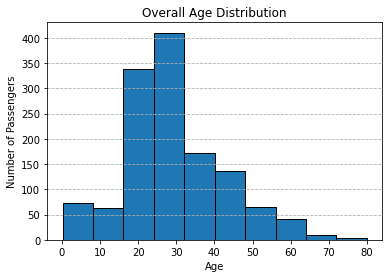

In [22]:
plt.hist(titanic_all["Age"], edgecolor='black')

plt.grid(axis='y', linestyle = '--')

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Overall Age Distribution')

## Age Distribution per class

In [23]:
class_1 = titanic_all[titanic_all['Pclass'] == 1]
class_2 = titanic_all[titanic_all['Pclass'] == 2]
class_3 = titanic_all[titanic_all['Pclass'] == 3]

plt.rc('axes', titlesize=14) #fontsize of the titles
plt.rc('axes', labelsize=12) #fontsize of the x and y labels

Text(0.5, 1.0, 'First Class')

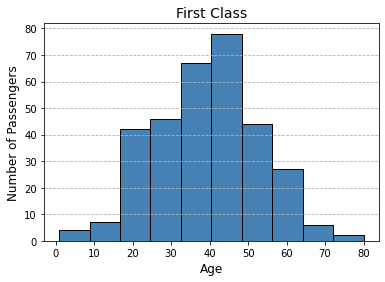

In [24]:
plt.hist(class_1["Age"], edgecolor='black', color='steelblue')

plt.grid(axis='y', linestyle = '--')

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title("First Class")

Text(0.5, 1.0, 'Second Class')

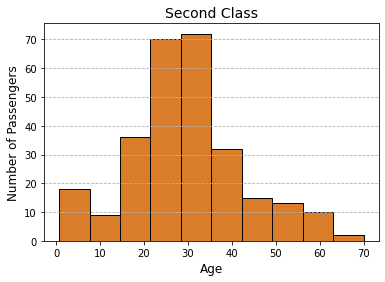

In [25]:
plt.hist(class_2["Age"], edgecolor='black', color='#d97d2a')

plt.grid(axis='y', linestyle = '--')

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title("Second Class")

Text(0.5, 1.0, 'Third Class')

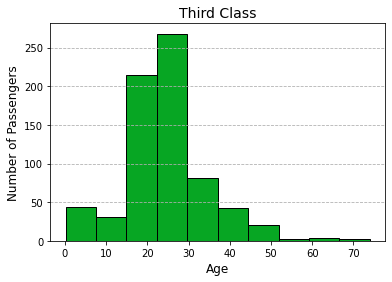

In [26]:
plt.hist(class_3["Age"], edgecolor='black', color='#07a623')

plt.grid(axis='y', linestyle = '--')

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title("Third Class")

Text(0.5, 1.0, 'Class Distribution')

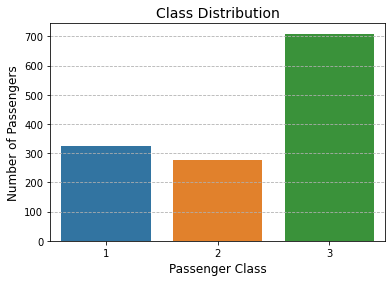

In [27]:
#Majority of passengers were Third Class
sns.countplot(x='Pclass', data=titanic_all)

plt.grid(axis='y', linestyle = '--')

plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title("Class Distribution")

## Survival Distributions in training data

Text(0.5, 1.0, 'Survival Distribution')

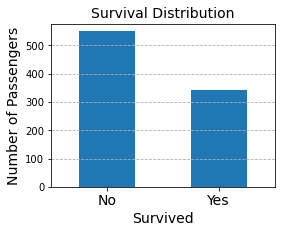

In [28]:
# from the training data: how many survived
survivedGroup = train_data.groupby('Survived').size()

ax1 = survivedGroup.plot(kind='bar', figsize=(4,3))

ax1.set_xticklabels(['No','Yes'])
plt.xticks(rotation='horizontal', fontsize=14)
plt.grid(axis='y', linestyle = '--')

plt.xlabel('Survived',fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.title("Survival Distribution")

In [29]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=train_data["Sex"],columns=train_data["Survived"])
CrossTabResult

Survived,0,1
Sex,,
female,81,233
male,468,109


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

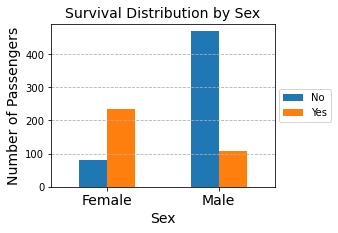

In [30]:
ax2 = CrossTabResult.plot(kind='bar', figsize=(4,3))
plt.xticks(rotation='horizontal', fontsize=14)
plt.xlabel('Sex',fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.legend(labels=("No","Yes"), loc=(1.02,.4))
plt.title("Survival Distribution by Sex")
plt.grid(axis='y', linestyle = '--')
ax2.set_xticklabels(['Female','Male'])

In [31]:
CrossTab2=pd.crosstab(index=train_data["Survived"], columns=train_data['Pclass'])
CrossTab2

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


[Text(0, 0, '0'), Text(1, 0, '1')]

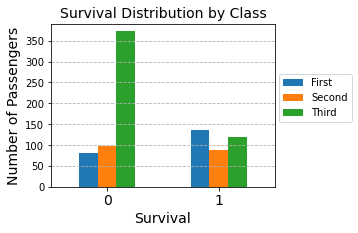

In [32]:
ax2 = CrossTab2.plot(kind='bar', figsize=(4,3))
plt.xticks(rotation='horizontal', fontsize=14)
plt.xlabel('Survival',fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.legend(labels=("First","Second","Third"), loc=(1.02,.4))
plt.title("Survival Distribution by Class")
plt.grid(axis='y', linestyle = '--')
ax2.set_xticklabels(['0','1'])

0 represents passengers that did not survive and 1 represents survival

## Dropping the qualitative columns we don't need

In [33]:
# new variable 'titanic_train' is table without qualitative columns
DropCols=["PassengerId", "Name", "Ticket", "Cabin", "Embarked"]
titanic_train=train_data.drop(DropCols, axis=1)
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,22.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


## Chaning the sex column to an integer

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [35]:
gender = LabelEncoder()
titanic_train['Gender'] = gender.fit_transform(titanic_train['Sex'])
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Gender
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1


In [36]:
titanic_train = titanic_train.drop(['Sex'], axis=1)

In [37]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


### Now the training data is ready, so we'll do the same for the test data

In [38]:
DropCols=["PassengerId", "Name", "Ticket", "Cabin", "Embarked"]
titanic_test=test_data.drop(DropCols, axis=1)
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,0,0,7.8292
1,3,female,38.0,1,0,7.0000
2,2,male,26.0,0,0,9.6875
3,3,male,35.0,0,0,8.6625
4,3,female,35.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,29.5,0,0,8.0500
414,1,female,44.0,0,0,108.9000
415,3,male,22.0,0,0,7.2500
416,3,male,34.0,0,0,8.0500


In [39]:
gender = LabelEncoder()
titanic_test['Gender'] = gender.fit_transform(titanic_test['Sex'])
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Gender
0,3,male,22.0,0,0,7.8292,1
1,3,female,38.0,1,0,7.0000,0
2,2,male,26.0,0,0,9.6875,1
3,3,male,35.0,0,0,8.6625,1
4,3,female,35.0,1,1,12.2875,0


In [40]:
titanic_test = titanic_test.drop(['Sex'], axis=1)

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.0,0,0,7.8292,1
1,3,38.0,1,0,7.0000,0
2,2,26.0,0,0,9.6875,1
3,3,35.0,0,0,8.6625,1
4,3,35.0,1,1,12.2875,0
...,...,...,...,...,...,...
413,3,29.5,0,0,8.0500,1
414,1,44.0,0,0,108.9000,0
415,3,22.0,0,0,7.2500,1
416,3,34.0,0,0,8.0500,1


In [41]:
titanic_test

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.0,0,0,7.8292,1
1,3,38.0,1,0,7.0000,0
2,2,26.0,0,0,9.6875,1
3,3,35.0,0,0,8.6625,1
4,3,35.0,1,1,12.2875,0
...,...,...,...,...,...,...
413,3,29.5,0,0,8.0500,1
414,1,44.0,0,0,108.9000,0
415,3,22.0,0,0,7.2500,1
416,3,34.0,0,0,8.0500,1


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
X_train = titanic_train.drop(['Survived'], axis=1)
Y_train = titanic_train["Survived"]
X_test = titanic_test.copy()

X_train.head(10)

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
5,3,25.0,0,0,8.4583,1
6,1,54.0,0,0,51.8625,1
7,3,2.0,3,1,21.0750,1
8,3,27.0,0,2,11.1333,0
9,2,14.0,1,0,30.0708,0


In [44]:
model = LogisticRegression()

model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)

model.score(X_train, Y_train)

0.8080808080808081

In [ ]:
# we want classification - decision trees